In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [5]:
#Data Read
df_istanbul = pd.read_csv('/Users/iremn/PythonClass/Spiced/Personal_Projects/Weather/ECA_blended_custom/TG_STAID000248.txt', header = 14)

In [6]:
df_istanbul.columns = ['Source ID', 'Date', 'Mean Temp*10', 'Qual']

In [7]:
df_istanbul['Date'] = pd.to_datetime(df_istanbul['Date'], format="%Y%m%d")

In [8]:
#New DF from Suspect
df_istanbul_suspect = df_istanbul[df_istanbul['Qual'] == 1]


In [9]:
#Remove data Qual = 9
df_istanbul = df_istanbul[df_istanbul['Qual'] != 9]


In [10]:
df_istanbul['Real_temp'] = df_istanbul['Mean Temp*10']/10

In [11]:
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp
0,101231,1929-01-01,126,0,12.6
1,101231,1929-01-02,133,0,13.3
2,101231,1929-01-03,131,0,13.1
3,101231,1929-01-04,118,0,11.8
4,101231,1929-01-05,106,0,10.6


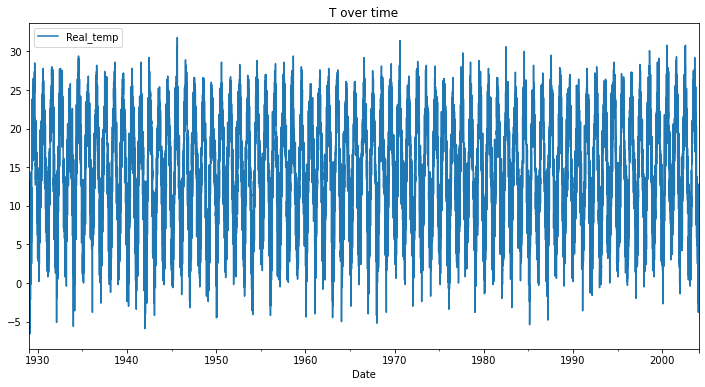

In [12]:
#Plot
df_istanbul.plot(x = 'Date', y= 'Real_temp', figsize=(12,6), title='T over time')


# De-trend this 

In [13]:
#Linear
df_istanbul['lin_difference'] = df_istanbul['Real_temp'].diff()
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference
0,101231,1929-01-01,126,0,12.6,NaN
1,101231,1929-01-02,133,0,13.3,0.7
2,101231,1929-01-03,131,0,13.1,-0.2
3,101231,1929-01-04,118,0,11.8,-1.3
4,101231,1929-01-05,106,0,10.6,-1.2


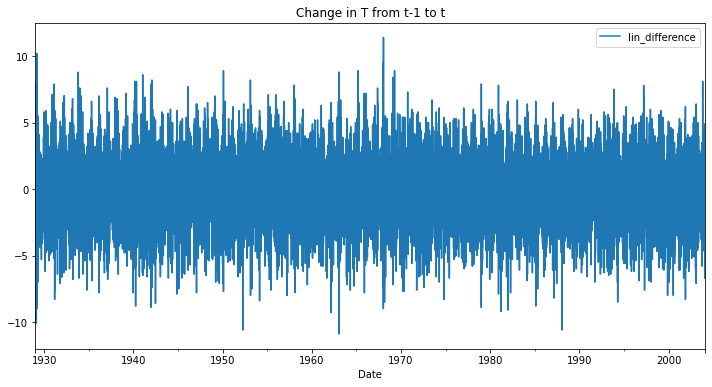

In [14]:
df_istanbul.plot(x = 'Date', y= 'lin_difference',figsize=(12,6), title='Change in T from t-1 to t')
plt.show()

In [15]:
#Check if it is linear
df_istanbul['lin_difference'].mean() # so it is linear - there is no exponential increase

-0.000291725923494874

# By rolling mean #

In [16]:
df_istanbul['rolling_mean'] = df_istanbul['Real_temp'].rolling(365, center=True).mean()
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean
0,101231,1929-01-01,126,0,12.6,NaN,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN
2,101231,1929-01-03,131,0,13.1,-0.2,NaN
3,101231,1929-01-04,118,0,11.8,-1.3,NaN
4,101231,1929-01-05,106,0,10.6,-1.2,NaN


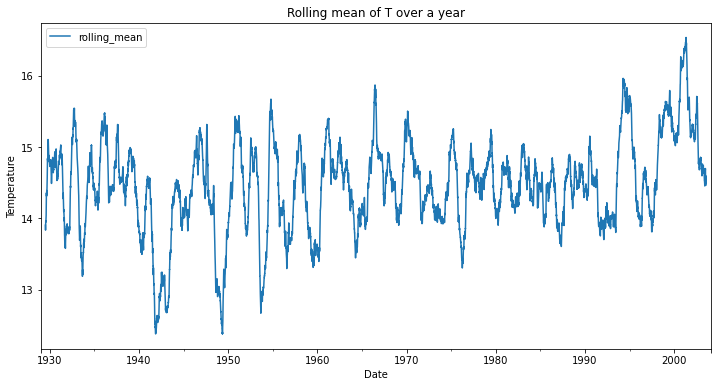

In [17]:
df_istanbul.plot(x = 'Date', y= 'rolling_mean', figsize=(12, 6))
plt.title('Rolling mean of T over a year')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

In [18]:
df_istanbul['de-trended'] = df_istanbul['Real_temp'] - df_istanbul['rolling_mean']
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN


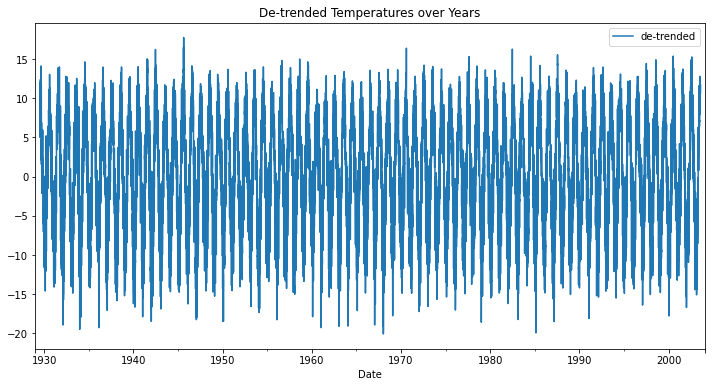

In [19]:
#Plot
df_istanbul.plot(x = 'Date', y= 'de-trended',figsize=(12,6), title='De-trended Temperatures over Years')

# Remove change in volatility if any

In [20]:
df_istanbul['log_y'] = np.log(df_istanbul['Real_temp'])
df_istanbul['log_diff'] = df_istanbul.log_y.diff()
df_istanbul.head()

/anaconda3/envs/fbprophet/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/fbprophet/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/fbprophet/lib/python3.7/site-packages/pandas/core/algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended,log_y,log_diff
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN,2.533697,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN,2.587764,0.054067
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN,2.572612,-0.015152
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN,2.468100,-0.104513
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN,2.360854,-0.107246


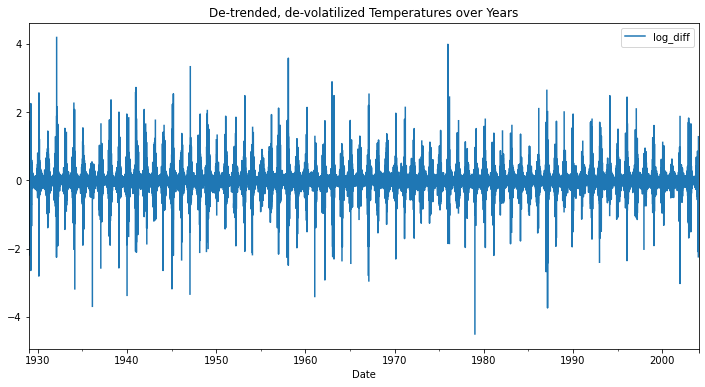

In [21]:
#Plot
df_istanbul.plot(x = 'Date', y= 'log_diff',figsize=(12,6), title='De-trended, de-volatilized Temperatures over Years')

In [22]:
#Make a month column

In [23]:
df_istanbul['Month'] = df_istanbul['Date'].dt.month

# Take out the seasonality by grouping in months 

In [24]:
df_istanbul['monthly_mean'] = df_istanbul.groupby('Month')['log_diff'].transform('mean')


In [25]:
df_istanbul['de-seasonalized'] = df_istanbul['log_diff'] - df_istanbul['monthly_mean']

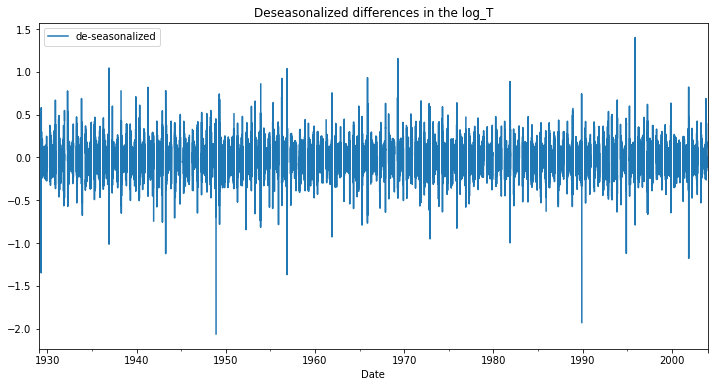

In [26]:
df_istanbul.plot(x='Date', y ='de-seasonalized', figsize=(12,6), title='Deseasonalized differences in the log_T')

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

ModuleNotFoundError: No module named 'statsmodels'

In [28]:
df_istanbul_reind = df_istanbul.set_index('Date')

In [29]:
decompose = seasonal_decompose(df_istanbul_reind['Real_temp'], model='additive')
print(decompose.plot())

NameError: name 'seasonal_decompose' is not defined

# Is it centeralized around normal? (ie zero and a symmetric distribution) 

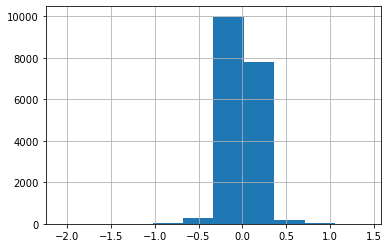

In [30]:
df_istanbul['de-seasonalized'].hist(bins=10)

### 1D heatmap 

In [31]:
df_istanbul.head()

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended,log_y,log_diff,Month,monthly_mean,de-seasonalized
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN,2.533697,NaN,1,NaN,NaN
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN,2.587764,0.054067,1,NaN,NaN
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN,2.572612,-0.015152,1,NaN,NaN
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN,2.468100,-0.104513,1,NaN,NaN
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN,2.360854,-0.107246,1,NaN,NaN


In [32]:
df_istanbul['year'] = df_istanbul['Date'].dt.year

In [33]:
df_istanbul

,Source ID,Date,Mean Temp*10,Qual,Real_temp,lin_difference,rolling_mean,de-trended,log_y,log_diff,Month,monthly_mean,de-seasonalized,year
0,101231,1929-01-01,126,0,12.6,NaN,NaN,NaN,2.533697,NaN,1,NaN,NaN,1929
1,101231,1929-01-02,133,0,13.3,0.7,NaN,NaN,2.587764,0.054067,1,NaN,NaN,1929
2,101231,1929-01-03,131,0,13.1,-0.2,NaN,NaN,2.572612,-0.015152,1,NaN,NaN,1929
3,101231,1929-01-04,118,0,11.8,-1.3,NaN,NaN,2.468100,-0.104513,1,NaN,NaN,1929
4,101231,1929-01-05,106,0,10.6,-1.2,NaN,NaN,2.360854,-0.107246,1,NaN,NaN,1929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27419,101231,2004-01-27,36,0,3.6,2.6,NaN,NaN,1.280934,1.280934,1,NaN,NaN,2004
27420,101231,2004-01-28,85,0,8.5,4.9,NaN,NaN,2.140066,0.859132,1,NaN,NaN,2004
27421,101231,2004-01-29,128,0,12.8,4.3,NaN,NaN,2.549445,0.409379,1,NaN,NaN,2004
27422,101231,2004-01-30,78,0,7.8,-5.0,NaN,NaN,2.054124,-0.495321,1,NaN,NaN,2004


In [34]:
from sklearn.model_selection import TimeSeriesSplit

### Train Test Split

In [41]:
len(df_istanbul)

27424

In [42]:
tscv = TimeSeriesSplit()

In [46]:
for train_index, test_index in tscv.split(df_istanbul):
    X_train, X_test = df_istanbul[train_index], df_istanbul[test_index]

KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573],\n           dtype='int64', length=4574)] are in the [columns]"

In [61]:
X = df_istanbul['Date']

In [62]:
X

0       1929-01-01
1       1929-01-02
2       1929-01-03
3       1929-01-04
4       1929-01-05
           ...    
27419   2004-01-27
27420   2004-01-28
27421   2004-01-29
27422   2004-01-30
27423   2004-01-31
Name: Date, Length: 27424, dtype: datetime64[ns]

In [63]:
splits = TimeSeriesSplit(n_splits=5)

In [64]:
import matplotlib.pyplot as plt

In [65]:
plt.figure(1)
index = 1

<Figure size 432x288 with 0 Axes>

Observations: 9144
Training Observations: 4574
Testing Observations: 4570


ConversionError: Failed to convert value(s) to axis units: array([None, None, None, ..., Timestamp('1954-01-11 00:00:00'),
       Timestamp('1954-01-12 00:00:00'), Timestamp('1954-01-13 00:00:00')],
      dtype=object)

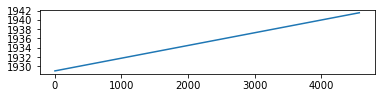

In [66]:
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    plt.subplot(310 + index)
    plt.plot(train)
    plt.plot([None for i in train] + [x for x in test])
    index += 1
plt.show()

In [55]:
len(train)

4574

In [54]:
test

array(['1941-07-11T00:00:00.000000000', '1941-07-12T00:00:00.000000000',
       '1941-07-13T00:00:00.000000000', ...,
       '1954-01-11T00:00:00.000000000', '1954-01-12T00:00:00.000000000',
       '1954-01-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [83]:
m = Prophet(daily_seasonality=True)

In [70]:
prophet_df = df_istanbul[['Date', 'Real_temp']]

In [80]:
prophet_df.rename(columns={'Date': 'ds', 'Real_temp':'y'}, inplace=True)

/anaconda3/envs/fbprophet/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
prophet_df

,ds,y
0,1929-01-01,12.6
1,1929-01-02,13.3
2,1929-01-03,13.1
3,1929-01-04,11.8
4,1929-01-05,10.6
...,...,...
27419,2004-01-27,3.6
27420,2004-01-28,8.5
27421,2004-01-29,12.8
27422,2004-01-30,7.8


In [84]:
m.fit(prophet_df)

In [85]:
future = m.make_future_dataframe(periods=365)

In [86]:
future.tail()

,ds
27784,2005-01-26
27785,2005-01-27
27786,2005-01-28
27787,2005-01-29
27788,2005-01-30


In [87]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
27784,2005-01-26,6.241640,2.457068,9.969203
27785,2005-01-27,6.258556,2.508269,10.362721
27786,2005-01-28,6.285196,2.521463,10.179210
27787,2005-01-29,6.325582,2.465075,10.306455
27788,2005-01-30,6.369337,2.083758,10.248139


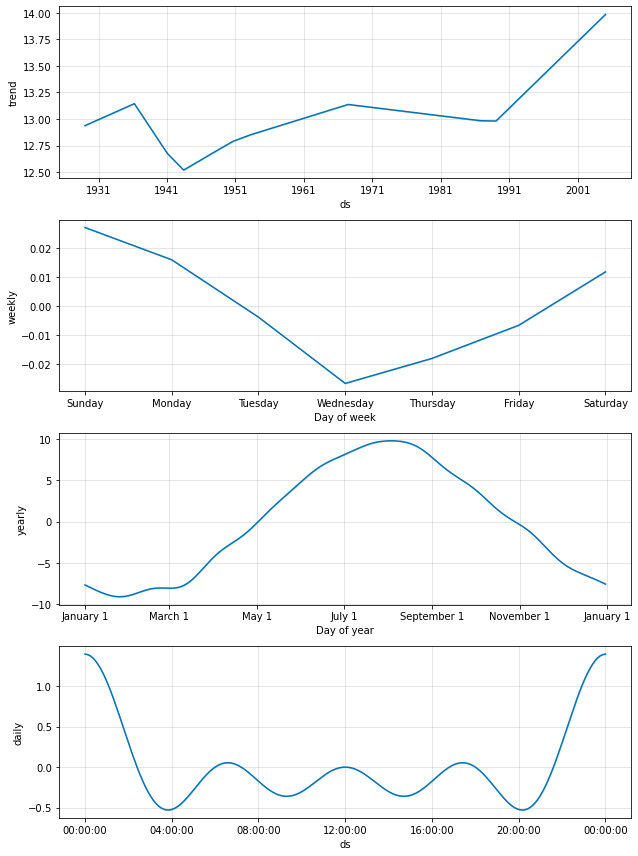

In [97]:
fig2 = m.plot_components(forecast)

AttributeError: 'Figure' object has no attribute 'set_xlim'

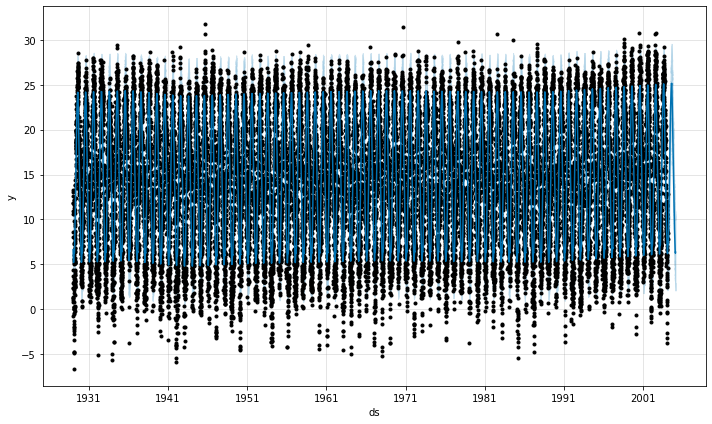

In [100]:
fig1 = m.plot(forecast)
fig1.set_xlim([2000, 2006])